In [5]:
import comet_ml
from comet_ml import API
import os

from utils.model_utils import *
from utils.plot_utils import *
from model_testing import *

In [2]:
api_key = os.environ.get("COMET_API_KEY") # "cX0b8GkNwZ3M1Bzj4d2oeqFmd"  # insert your API key
workspace_name = "nhl-analytics-milestone-2"

# get test data for baseline models
df_rs_bm, df_playoffs_bm = get_test_data_baseline_models()

# get test data for advanced models
df_rs_am, df_playoffs_am = get_test_data_advanced_models()

# in order to have all the predictions of the models in each figure (for regular season and playoffs)
all_predictions_rs = []
all_y_true_rs = []
all_predictions_pl = []
all_y_true_pl = []

None


## Add all predictions and true label data together to prepare for the figures

Here we download all the selected models and make predictions on the regular season dataset and the playoffs dataset of the 2019-2020 season.

In [3]:
# download the 5 models programmatically using the Python API
download_model(api_key, workspace_name, model_name="logisticregressiondistancetogoal", version="1.1.0")
download_model(api_key, workspace_name, model_name="logisticregressionshootingangle", version="1.1.0")
download_model(api_key, workspace_name, model_name="logisticregressiondistancetogoal_shootingangle", version="1.1.0")
download_model(api_key, workspace_name, model_name="xgboost_2", version="1.2.0")
download_model(api_key, workspace_name, model_name="first-neural-network", version="1.10.0")



feature_list = [["DistanceToGoal"], ["ShootingAngle"], ["DistanceToGoal","ShootingAngle"]]
for feature in feature_list:
    # test the logistic regression:
    prediction_lr_rs, y_true_rs = predict_logreg(df_rs_bm, feature)  # regular season
    prediction_lr_pl, y_true_pl = predict_logreg(df_playoffs_bm, feature)  # playoffs
    
    # add prediction and y_true to the lists
    all_predictions_rs.append(prediction_lr_rs)
    all_y_true_rs.append(y_true_rs.reshape(-1, 1))
    all_predictions_pl.append(prediction_lr_pl)
    all_y_true_pl.append(y_true_pl.reshape(-1, 1))

# test the neural network:
prediction_nn_rs, y_true_nn_rs = predict_neural_network(df_rs_am)  # regular season
prediction_nn_pl, y_true_nn_pl = predict_neural_network(df_playoffs_am)  # playoffs

# add prediction and y_true to the lists
all_predictions_rs.append(prediction_nn_rs)
all_predictions_pl.append(prediction_nn_pl)
all_y_true_rs.append(y_true_nn_rs)
all_y_true_pl.append(y_true_nn_pl)

# test XGBoost models:
prediction_xgb_rs, ylabel_xgb_rs = predict_xgboost(df_rs_am)  # regular season
prediction_xgb_pl, ylabel_xgb_pl = predict_xgboost(df_playoffs_am)  # playoffs

# add prediction and y_true to the lists
all_predictions_rs.append(prediction_xgb_rs)
all_predictions_pl.append(prediction_xgb_pl)
all_y_true_rs.append(ylabel_xgb_rs)
all_y_true_pl.append(ylabel_xgb_pl)

COMET INFO: Downloading registry model 'logisticregressiondistancetogoal', version '1.1.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/Users/miloshdevic/Documents/MILA/Science des données/Project/NHL_analytics/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregressionshootingangle', version '1.1.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/Users/miloshdevic/Documents/MILA/Science des données/Project/NHL_analytics/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregressiondistancetogoal_shootingangle', version '1.1.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/Users/miloshdevic/Documents/MILA/Science des données/Project/NHL_analytics/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'xgboost_2', version '1.2.0', stage None from workspace 'nhl-analytic

146/146 [==============================] - 1s 3ms/step


/Users/miloshdevic/opt/miniconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:35:50] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


# 2019-2020 Regular Season Dataset

## Plot ROC, goal rate, cumulativate proportion, and calibration plots for our 5 models (3 logistic regression models, 1 neural network model, 1 XGBoost model)

In [ ]:
# labels and line styles
labels = ['LRDistance', 'LRShooting', 'LRDistance_ShootingAngle', 'nn', 'XGBoost']
linestyles = ['-', '-', '-', '-', '-']

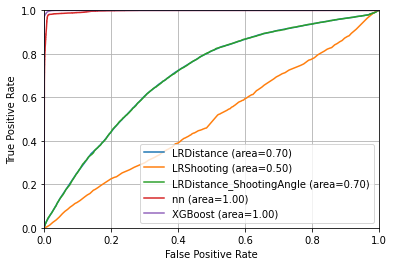

In [5]:
# plot ROC curves
plot_roc_curve(all_predictions_rs, all_y_true_rs, linestyles, labels)#, "roc_5models_rs")

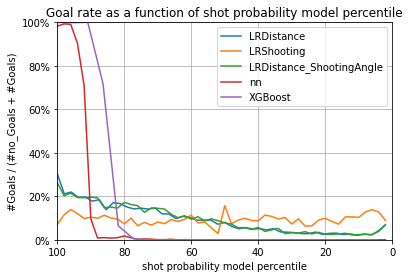

In [9]:
# make the NN prediction 1D
all_predictions_rs[3] = all_predictions_rs[3].flatten()

# plot goal rate
percentile, percentile_pred, y_valid_df = shot_prob_model_percentile(all_predictions_rs[0], all_y_true_rs[0])

plot_goal_rate(all_predictions_rs, all_y_true_rs, labels)#, "goal_rate_5models_rs")

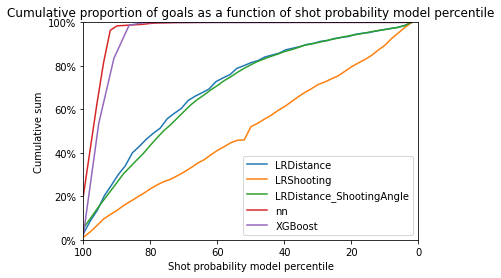

In [10]:
# plot cumulativate proportion
plot_cumulative_sum(all_predictions_rs, all_y_true_rs, labels)#, "cumulative_5models_rs")

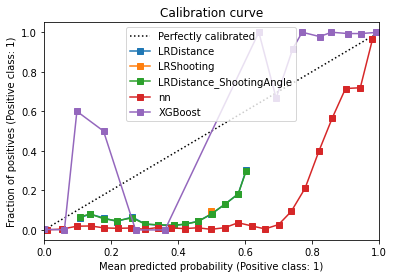

In [11]:
# plot reliability curve
plot_calibration(all_predictions_rs, all_y_true_rs, labels)#, "calibration_5models_rs")

# 2020 Playoffs Dataset

## Plot ROC, goal rate, cumulativate proportion, and calibration plots for our 5 models (3 logistic regression models, 1 neural network model, 1 XGBoost model)

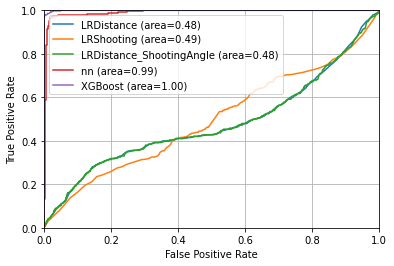

In [12]:
# plot ROC curves
plot_roc_curve(all_predictions_pl, all_y_true_pl, linestyles, labels)#, "roc_5models_pl")

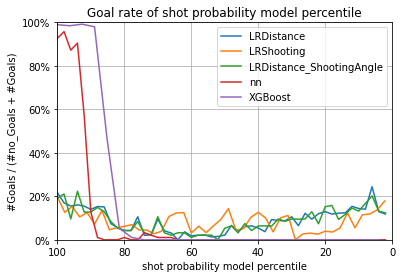

In [14]:
# make NN predictions 1D
all_predictions_pl[3] = all_predictions_pl[3].flatten()

# plot goal rate
percentile, percentile_pred, y_valid_df = shot_prob_model_percentile(all_predictions_pl[0], all_y_true_pl[0])

plot_goal_rate_5models(all_predictions_pl, all_y_true_pl, labels)#, "goal_rate_5models_pl")

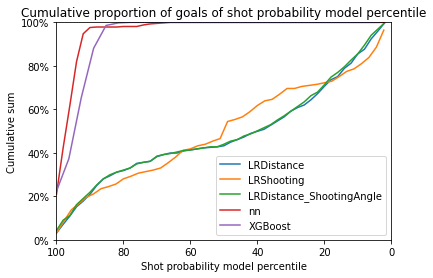

In [15]:
# plot cumulative proportion
plot_cumulative_sum_5models(all_predictions_pl, all_y_true_pl, labels)#, "cumulative_5models_pl")

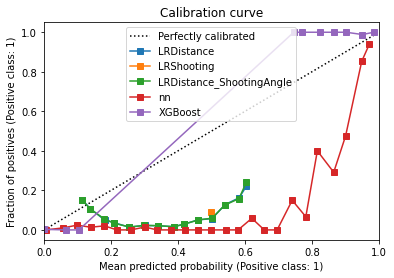

In [16]:
# plot reliability curves
plot_calibration(all_predictions_pl, all_y_true_pl, labels)#, "calibration_5models_pl")